In [205]:
from extract_desserts import *

In [206]:
#load the raw data
# lets use the default value that only loads 250 recipes,
# instead of 1 million
raw_data = get_raw_data()
raw_ingredients = get_raw_ingredients()

Loading file  ../data/sample_layer1.json
Loading ingredient file: ../data/sample_det_ingrs.json


In [207]:
print('N recipes: ',len(raw_data),'\t N list of ingredients ', len(raw_ingredients))

N recipes:  20000 	 N list of ingredients  20000


In [208]:
desserts, dessert_ings = find_desserts(raw_data, raw_ingredients)

In [209]:
total_recipes = len(raw_data)
dessert_recipes = len(desserts)
dessert_ingredients = len(dessert_ings)
print('Will look at {} dessert recipes, out of {} (~{:1.1f}%)'.format(
                            dessert_recipes, total_recipes,
                            dessert_recipes/total_recipes*100))

Will look at 4793 dessert recipes, out of 20000 (~24.0%)


In [210]:
item = 123
print(dessert_ings[item]['valid'])
dessert_ings[item]['ingredients']

[True, True, True, True, True, True, True, True, True]


[{'text': 'butter'},
 {'text': 'sugar'},
 {'text': 'baking soda'},
 {'text': 'eggs'},
 {'text': 'flour'},
 {'text': 'cocoa'},
 {'text': 'soured milk'},
 {'text': 'raisins'},
 {'text': 'vanilla'}]

In [213]:
# create bag of ingredients

all_ingredients = []

for recipe_ings in dessert_ings:
    n_ingredients = len(recipe_ings['valid'])
    for item, ingredient in enumerate(recipe_ings['ingredients']):
        if recipe_ings['valid'][item] ==True:
            ingred = ingredient['text']
            if ingred=='eggs':
                ingred='egg'
            elif 'butter' in ingred:
                ingred = 'butter'
            
            elif ingred == 'granulated sugar':
                ingred= 'sugar'
            elif 'flour' in ingred:
                ingred = 'flour'
#             elif ingred == 'all - purpose flour' or ingred == 'cake flour':
#                 ingred = 'flour'
            elif ingred == 'boiling water' or  ingred=='cold water':
                ingred = 'water'
            elif ingred== 'light brown sugar' or ingred == 'dark brown sugar':
                ingred = 'sugar'
            elif ingred == 'vanilla extract' or ingred == 'pure vanilla extract':
                ingred = 'vanilla'
            elif ingred == 'fresh lemon juice':
                ingred = 'lemon juice'
            if ingred not in spices:
                all_ingredients.append(ingred)
            

In [214]:
ingredient_set = set(all_ingredients)
print('with {} recipes, there are {} ingredients, and {} unique ingredients.'.format(
                dessert_recipes, len(all_ingredients), len(ingredient_set)))

with 4793 recipes, there are 29696 ingredients, and 3024 unique ingredients.


In [215]:
spices =['sugar','salt','water','baking soda','baking powder','flour', 'vegetable oil',
        'olive oil', 'cornstarch','nutmeg','white sugar','powdered sugar', 'brown sugar',
        'margarine','oil','shortening','kosher salt',"confectioners' sugar",'icing sugar',
        'canola oil','pepper' ,'low - fat milk','light corn syrup',]

In [216]:
from nltk import FreqDist

In [217]:
fdist = FreqDist(all_ingredients)
print(fdist)

<FreqDist with 3024 samples and 29696 outcomes>


In [218]:
fdist.most_common(100)

[('butter', 3201),
 ('egg', 2083),
 ('vanilla', 1813),
 ('milk', 874),
 ('cinnamon', 466),
 ('cream cheese', 408),
 ('ground cinnamon', 360),
 ('lemon juice', 347),
 ('heavy cream', 345),
 ('honey', 326),
 ('pecans', 288),
 ('walnuts', 256),
 ('sour cream', 231),
 ('egg yolks', 222),
 ('egg whites', 177),
 ('semi - sweet chocolate chips', 173),
 ('whipping cream', 169),
 ('bananas', 168),
 ('cocoa powder', 138),
 ('chocolate chips', 135),
 ('ground nutmeg', 129),
 ('raisins', 128),
 ('garlic cloves', 127),
 ('almond extract', 115),
 ('ground ginger', 112),
 ('nuts', 112),
 ('cocoa', 107),
 ('onions', 106),
 ('whole milk', 103),
 ('onion', 102),
 ('sweetened condensed milk', 102),
 ('egg yolk', 101),
 ('unsweetened cocoa powder', 99),
 ('ground cloves', 99),
 ('orange juice', 98),
 ('strawberries', 94),
 ('heavy whipping cream', 94),
 ('evaporated milk', 90),
 ('apples', 87),
 ('semisweet chocolate', 87),
 ('lemon zest', 84),
 ('bittersweet chocolate', 83),
 ('cream of tartar', 81),
 ('

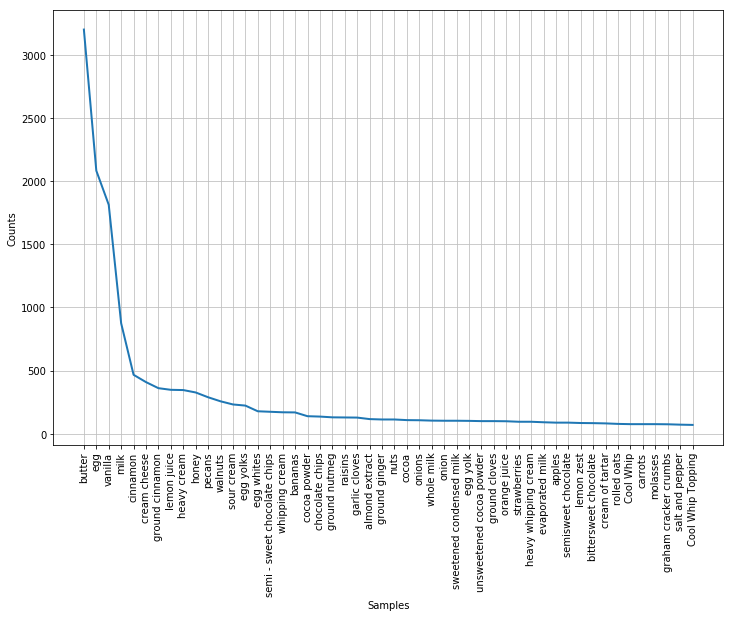

In [219]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(12, 8))
# plt.ylim(0,120)
fdist.plot(50,cumulative=False)
# plt.ylim(0,30)
# plt.show()

In [ ]:
import nltk
from nltk.corpus import stopwords
import string

from nltk import word_tokenize, FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy as np
np.random.seed(23)

In [ ]:
stopwords_list  = stopwords.words('english')
stopwords_list += list(string.punctuation)
stopwords_list +=

In [ ]:
stopwords_list[-20:]